<a href="https://colab.research.google.com/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/blob/main/lectures/Lecture25_Wk11-14_ML_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error


# Load the data




## Learning Materials: [**`Python for Data Analysis, 3E`**](https://wesmckinney.com/book//)

**5**  Getting Started with pandas

**6**  Data Loading, Storage, and File Formats



## Learning Management System Materials:

**Week 4 [Pandas & EDA](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

  Lecture07-08 Presentation

  Lecture 7-8 Notebook Pandas

## from the Cloud

In [2]:
url = 'https://data.calgary.ca/resource/4ur7-wsgc.csv'
df = pd.read_csv(url)
print(df.head())




   roll_year  roll_number                   address  assessed_value  \
0       2005     61532909          1 10 POINT DR NW        198500.0   
1       2005     79500005            1 101 25 AV SW        165000.0   
2       2005    200617975    1 108 ROCKYLEDGE VW NW         88500.0   
3       2005     88507686      1 10 ST JULIEN DR SW        394000.0   
4       2005     73500001  1 100 PENNSYLVANIA RD SE        101000.0   

  assessment_class assessment_class_description  re_assessed_value  \
0               RE                  Residential           198500.0   
1               RE                  Residential           165000.0   
2               RE                  Residential            88500.0   
3               RE                  Residential           394000.0   
4               RE                  Residential           101000.0   

   nr_assessed_value  fl_assessed_value comm_code          comm_name  \
0                NaN                NaN       POI        POINT MCKAY   
1       

In [3]:
df.shape

(1000, 19)

## locally

In [4]:
cal_property = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA3320/calgary_property.csv")

In [5]:
cal_property.head()

,ROLL_YEAR,ADDRESS,ASSESSED_VALUE,COMM_NAME,YEAR_OF_CONSTRUCTION,PROPERTY_TYPE,LAND_SIZE_SM
0,2022,3420 80 AV NE,963500.0,CALGARY INTERNATIONAL AIRPORT,NaN,LO,17742.6
1,2022,4515 88 AV NE,597500.0,SADDLE RIDGE,1972.0,LI,17934.6
2,2022,102 417 3 AV NE,262500.0,CRESCENT HEIGHTS,2003.0,LI,1380.0
3,2022,5111 88 AV NE,565000.0,SADDLE RIDGE,1960.0,LI,19684.6
4,2022,201 417 3 AV NE,244000.0,CRESCENT HEIGHTS,2003.0,LI,1380.0


In [6]:
cal_property.shape

(2140207, 7)

# Preprocess the data

## Learning Materials: [**`Python for Data Analysis, 3E`**](https://wesmckinney.com/book//)

**7**  Data Cleaning and Preparation

**8**  Data Wrangling: Join, Combine, and Reshape

## Learning Management System Materials:

**Week 5 [Data Wrangling with Pandas](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

  Lecture 9 Notebook Data Wrangling I

  Lecture 10 Notebook Data Wrangling II

>Data cleaning: Handle missing values, outliers, and noise in the data.

>Feature engineering: Create new features or transform existing ones to improve the model's performance.

>Data normalization/standardization: Scale features to bring them to a similar range.

>Encoding categorical variables: Convert categorical variables to numeric ones using techniques like one-hot encoding or label encoding.

>Data splitting: Split the data into training, validation, and test sets.

## Missing value

In [7]:

# Clean the data (Checking for missing values)
print(cal_property.isnull().sum())


ROLL_YEAR                   0
ADDRESS                     2
ASSESSED_VALUE              1
COMM_NAME                   0
YEAR_OF_CONSTRUCTION    39698
PROPERTY_TYPE             128
LAND_SIZE_SM              173
dtype: int64


In [8]:
# Drop records with missing values
cal_property.dropna(inplace=True)

In [9]:
cal_property.shape

(2100461, 7)

## Feature Engineering

In [10]:
cal_property.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100461 entries, 1 to 2140183
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ROLL_YEAR             int64  
 1   ADDRESS               object 
 2   ASSESSED_VALUE        float64
 3   COMM_NAME             object 
 4   YEAR_OF_CONSTRUCTION  float64
 5   PROPERTY_TYPE         object 
 6   LAND_SIZE_SM          float64
dtypes: float64(3), int64(1), object(3)
memory usage: 128.2+ MB


In [11]:
# Feature engineering: Convert year columns to integers

cal_property['YEAR_OF_CONSTRUCTION'] = cal_property['YEAR_OF_CONSTRUCTION'].astype(int)

In [12]:
cal_property.sample(8)

,ROLL_YEAR,ADDRESS,ASSESSED_VALUE,COMM_NAME,YEAR_OF_CONSTRUCTION,PROPERTY_TYPE,LAND_SIZE_SM
694414,2020,7947 WENTWORTH DR SW,498000.0,WEST SPRINGS,2001,LI,311.0
1077790,2021,6884 RUNDLEHORN DR NE,285500.0,PINERIDGE,1978,LI,449.4
593424,2020,518 23 AV SW,586000.0,CLIFF BUNGALOW,1910,LI,278.7
1083052,2021,768 MARYVALE WY NE,385000.0,MARLBOROUGH,1971,LI,567.1
395251,2022,125 STRATHLEA CO SW,795000.0,STRATHCONA PARK,2002,LI,535.8
1258633,2021,1472 BERKLEY DR NW,512000.0,BEDDINGTON HEIGHTS,1980,LI,480.3
462831,2022,160 PROMENADE WY SE,293000.0,MCKENZIE TOWNE,2002,LI,3650.0
1958702,2023,100 WALDEN TC SE,687000.0,WALDEN,2011,LI,361.8


In [13]:
# Convert ASSESSED_VALUE to thousands
cal_property['ASSESSED_VALUE'] = cal_property['ASSESSED_VALUE'] / 1000

In [14]:
cal_property.tail()

,ROLL_YEAR,ADDRESS,ASSESSED_VALUE,COMM_NAME,YEAR_OF_CONSTRUCTION,PROPERTY_TYPE,LAND_SIZE_SM
2140102,2023,193 MAGNOLIA TC SE,230.5,MAHOGANY,2022,LI,241.0
2140125,2023,216 HERRON ME NE,375.5,LIVINGSTON,2022,LI,222.8
2140150,2023,1723A 30 AV SW,203.0,SOUTH CALGARY,2022,LI,290.2
2140151,2023,1723B 30 AV SW,169.0,SOUTH CALGARY,2022,LI,290.2
2140183,2023,29 HEIRLOOM CR SE,299.5,RANGEVIEW,2022,LI,251.5


In [15]:
# Encoding categorical features
cal_property = pd.get_dummies(cal_property, columns=['PROPERTY_TYPE'], drop_first=True)

In [16]:
cal_property.sample(6)

,ROLL_YEAR,ADDRESS,ASSESSED_VALUE,COMM_NAME,YEAR_OF_CONSTRUCTION,LAND_SIZE_SM,PROPERTY_TYPE_LO
2115962,2023,92 SOMERVALE PA SW,264.00,SOMERSET,1995,203.6,False
840228,2020,125 AUBURN BAY CM SE,278.00,AUBURN BAY,2009,640.0,False
937300,2020,95 SETON RI SE,151.00,SETON,2019,295.0,False
442597,2022,22 REDSTONE ME NE,555.50,REDSTONE,2014,334.3,False
1417263,2021,179S 205 QUARRY WY SE,2.25,DOUGLASDALE/GLEN,2012,17030.4,False
902333,2020,238V 402 KINCORA GLEN RD NW,10.00,KINCORA,2014,3336.9,False


# Explore the data

## Learning Materials: [**`Python for Data Analysis, 3E`**](https://wesmckinney.com/book//)

**9**   Plotting and Visualization

## Learning Management System Materials:

**Week 7 [Descriptive Statistics Sampling & Probability](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

Lecture11-12 Presentation

Lecture 11 Notebook Descriptive Statistics

Lecture 12 Notebook Intro to Probability

In [17]:
cal_property.describe()

,ROLL_YEAR,ASSESSED_VALUE,YEAR_OF_CONSTRUCTION,LAND_SIZE_SM
count,2.100461e+06,2.100461e+06,2.100461e+06,2.100461e+06
mean,2.021499e+03,4.390942e+02,1.992393e+03,3.143406e+03
std,1.117912e+00,1.022759e+03,2.046325e+01,8.228912e+03
min,2.020000e+03,0.000000e+00,1.890000e+03,0.000000e+00
25%,2.021000e+03,2.420000e+02,1.978000e+03,3.883000e+02
50%,2.021000e+03,3.920000e+02,1.998000e+03,5.519000e+02
75%,2.023000e+03,5.355000e+02,2.008000e+03,2.133700e+03
max,2.023000e+03,2.255800e+05,2.023000e+03,1.012159e+06


In [18]:
cal_property.groupby('ROLL_YEAR')['ASSESSED_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ROLL_YEAR,,,,,,,,
2020,522900.0,415.617250,908.337708,0.00,240.5,371.5,501.5,169460.0
2021,532650.0,405.852869,947.993112,0.00,229.5,361.0,492.0,150130.0
2022,517867.0,440.133282,1007.114364,2.25,243.5,398.0,535.5,179460.0
2023,527044.0,494.960659,1200.247926,0.00,261.5,452.5,611.0,225580.0


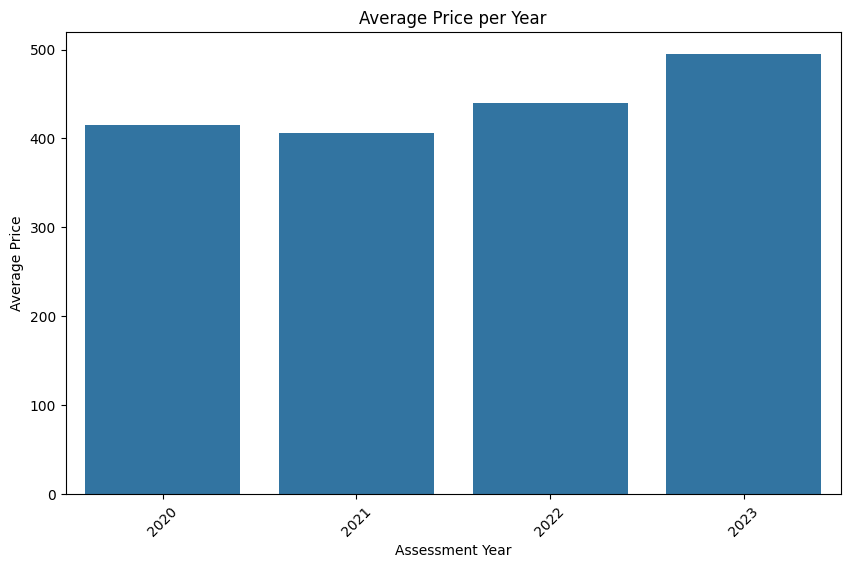

In [19]:
#  Bar chart for the average price per year
plt.figure(figsize=(10, 6))
avg_price_per_year = cal_property.groupby('ROLL_YEAR')['ASSESSED_VALUE'].mean().reset_index()
sns.barplot(x='ROLL_YEAR', y='ASSESSED_VALUE', data=avg_price_per_year)
plt.title('Average Price per Year')
plt.xlabel('Assessment Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

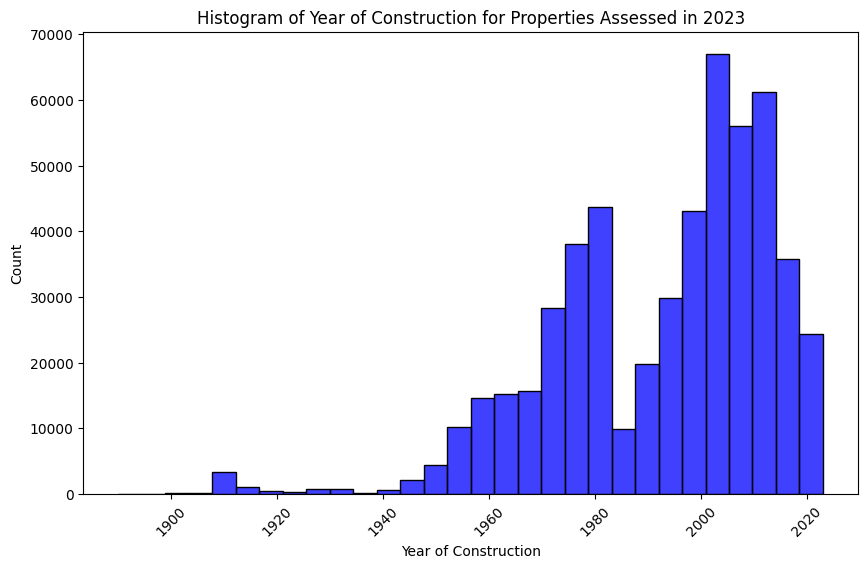

In [20]:
# Filter for the year 2023
cal_2023 = cal_property[cal_property['ROLL_YEAR'] == 2023]

# Plot histogram for YEAR_OF_CONSTRUCTION
plt.figure(figsize=(10, 6))
sns.histplot(cal_2023['YEAR_OF_CONSTRUCTION'], bins=30, kde=False, color='blue')
plt.title('Histogram of Year of Construction for Properties Assessed in 2023')
plt.xlabel('Year of Construction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


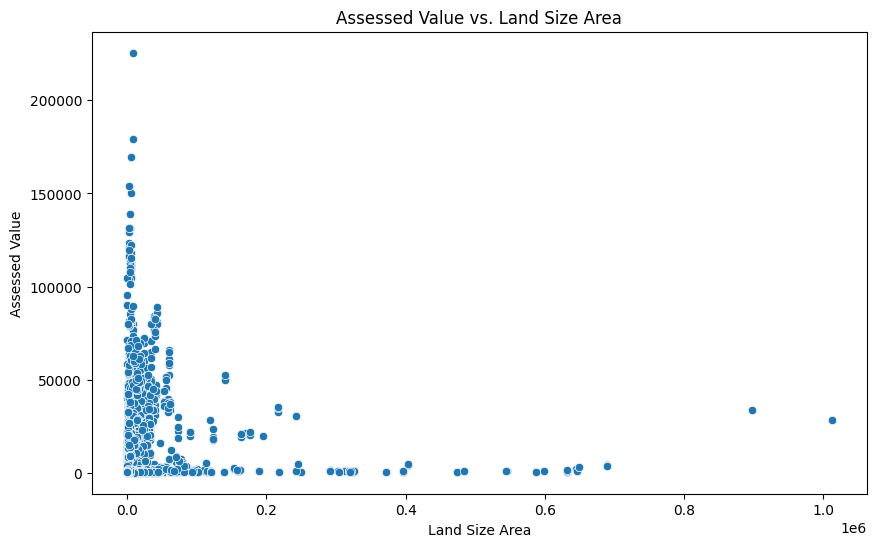

In [21]:
# Scatter plot for ASSESSED_VALUE vs. GROSS_BUILDING_AREA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LAND_SIZE_SM', y='ASSESSED_VALUE', data=cal_property)
plt.title('Assessed Value vs. Land Size Area')
plt.xlabel('Land Size Area')
plt.ylabel('Assessed Value')
plt.show()

In [22]:
cal_property.columns

Index(['ROLL_YEAR', 'ADDRESS', 'ASSESSED_VALUE', 'COMM_NAME',
       'YEAR_OF_CONSTRUCTION', 'LAND_SIZE_SM', 'PROPERTY_TYPE_LO'],
      dtype='object')

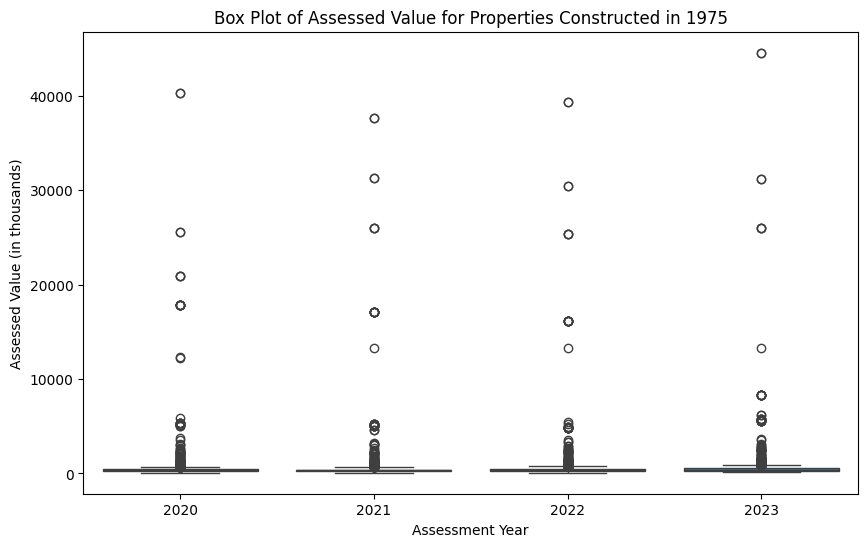

In [23]:

# Box plot for ASSESSED_VALUE by YEAR_OF_CONSTRUCTION == 1975

cal_property_1975 = cal_property[cal_property['YEAR_OF_CONSTRUCTION'] == 1975]

plt.figure(figsize=(10, 6))
sns.boxplot(x='ROLL_YEAR', y='ASSESSED_VALUE', data=cal_property_1975)
plt.title('Box Plot of Assessed Value for Properties Constructed in 1975')
plt.xlabel('Assessment Year')
plt.ylabel('Assessed Value (in thousands)')
plt.show()

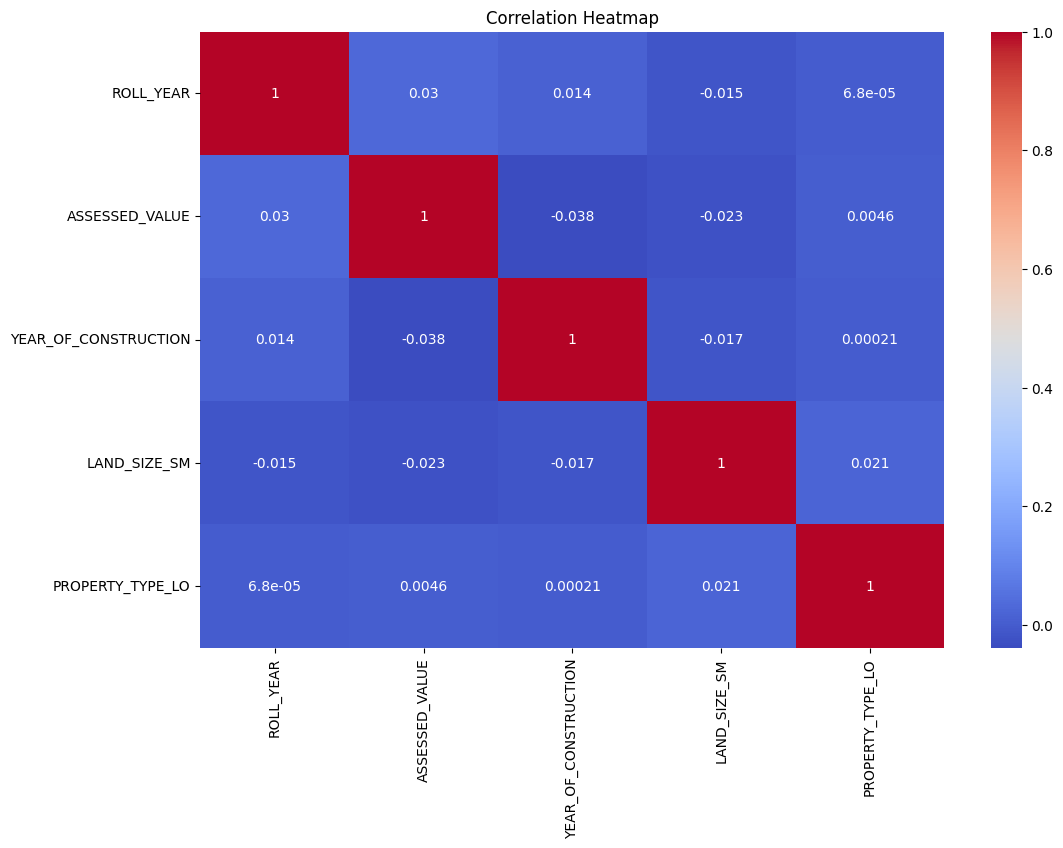

In [24]:
# Correlation heatmap
cal_property1 =cal_property.drop(['ADDRESS', 'COMM_NAME'], axis=1)
plt.figure(figsize=(12, 8))
corr_matrix = cal_property1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Select the Algorithms

>Choose algorithms: Select a few ML algorithms that are appropriate for your problem (e.g., Linear Regression, Decision Trees, SVM, etc.).

>Baseline model: Start with a simple baseline model to have a reference for performance.

## Learning Materials: **[Machine Learning with Python for Everyone](https://learning.oreilly.com/library/view/machine-learning-with/9780134845708/)**

**Chapter 3**  Predicting Categories: Getting Started with Classification

**Chapter 4**   Predicting Numerical Values: Getting Started with Regression

**Chapter 8**   More Classification Methods

**Chapter 9**   More Regression Methods


## Learning Management System Materials:

**Week 9 [Modeling- Linear Regression & KNN Regression](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

**Week 10 [Modeling- Logistic Regression & KNN Classification](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

**Week 12 [Regression Methods and Tuning](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

**Week 13 [Classification Methods](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**


# Train the Model

>Train models: Train multiple models using the training data.

>Hyperparameter tuning: Use techniques like Grid Search or Random Search to find the best hyperparameters for the models.

## Split the data & standardize features

In [25]:
# Split data

X = cal_property.drop(['ASSESSED_VALUE', 'ADDRESS', 'COMM_NAME'], axis=1)
y = cal_property['ASSESSED_VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Model Selection and Training
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

# Evaluate the Model

>Evaluate models: Use appropriate metrics (e.g., RMSE for regression, accuracy/F1-score for classification) to evaluate the models on validation data.

>Model comparison: Compare the performance of different models and select the best one.

>Cross-validation: Use cross-validation to ensure the model's performance is consistent across different subsets of the data.

## Learning Materials: **[Machine Learning with Python for Everyone](https://learning.oreilly.com/library/view/machine-learning-with/9780134845708/)**

**Chapter 5**   Evaluating and Comparing Learners

**Chapter 6**   Evaluating Classifiers

**Chapter 7**   Evaluating Regressors


## Learning Management System Materials:

**Week 9 [Modeling- Linear Regression & KNN Regression](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

**Week 10 [Modeling- Logistic Regression & KNN Classification](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**


In [28]:
# Step 5: Model Evaluation
y_pred_lr = lr.predict(X_test_scaled)

# R-squared
r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression R-squared:", r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression MAE:", mae)

#RMSE
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R-squared: 0.0032297450067257927
Linear Regression MAE: 219.52613439236612
Linear Regression RMSE: 956.5084572702598


# Improve the Model

>Feature selection: Select the most important features to improve model performance.

>Ensemble methods: Combine multiple models to improve accuracy (e.g., Random Forest, Gradient Boosting).

>Advanced techniques: Use advanced techniques like neural networks or deep learning if necessary.

## Learning Materials: **[Machine Learning with Python for Everyone](https://learning.oreilly.com/library/view/machine-learning-with/9780134845708/)**

**Chapter 10** Manual Feature Engineering: Manipulating Data for Fun and Profit

**Chapter 11** Tuning Hyperparameters and Pipelines

## Learning Management System Materials:
**Week 11 [ML Piplines](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

**Week 12 [Regression Methods and Tuning](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**

**Week 13 [Classification Methods](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**




# Deploy the Model

>Deploy model: Deploy the model into a production environment where it can start making predictions on new data.

## Learning Management System Materials:
**Week 11 [ML Piplines](https://nbviewer.org/github/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/tree/main/lectures/)**


# Classification

In [31]:
# Add a new column for above 600k
cal_property['above_600k'] = (cal_property['ASSESSED_VALUE'] > 600).astype(int)

In [32]:
cal_property.head()

,ROLL_YEAR,ADDRESS,ASSESSED_VALUE,COMM_NAME,YEAR_OF_CONSTRUCTION,LAND_SIZE_SM,PROPERTY_TYPE_LO,above_600k
1,2022,4515 88 AV NE,597.5,SADDLE RIDGE,1972,17934.6,False,0
2,2022,102 417 3 AV NE,262.5,CRESCENT HEIGHTS,2003,1380.0,False,0
3,2022,5111 88 AV NE,565.0,SADDLE RIDGE,1960,19684.6,False,0
4,2022,201 417 3 AV NE,244.0,CRESCENT HEIGHTS,2003,1380.0,False,0
5,2022,8825 52 ST NE,710.5,SADDLE RIDGE,2003,17740.4,False,1


In [34]:
# prompt: logistic regress model



# Prepare data for classification
X_class = cal_property.drop(['above_600k', 'ASSESSED_VALUE', 'ADDRESS', 'COMM_NAME'], axis=1)
y_class = cal_property['above_600k']

# Split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Standardize features
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_class_scaled, y_train_class)

# Predictions
y_pred_class = logreg.predict(X_test_class_scaled)

# Evaluation
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print("Logistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Logistic Regression Accuracy: 0.8262884646971028

Confusion Matrix:
 [[347116      4]
 [ 72971      2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90    347120
           1       0.33      0.00      0.00     72973

    accuracy                           0.83    420093
   macro avg       0.58      0.50      0.45    420093
weighted avg       0.74      0.83      0.75    420093

